<a href="https://colab.research.google.com/github/ConstanzaSchibber/capstone_colors/blob/main/notebooks/1_DataEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 1: Data Pipeline, Data Wrangling, Exploratory Data Analysis




# Libraries

Creating requirements for environment.

In [ ]:
!pip freeze > requirements.txt
!pip list --format=freeze > requirements.txt

Importing libraries.

In [1]:
import os
from getpass import getpass
import urllib
import requests

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob

In [4]:
from PIL import Image

In [10]:
import cv2
import numpy as np

In [ ]:
!pip install validators

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
import validators

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Reading & Wrangling Data

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/mauve products - products.csv')
df_1.columns

Index(['category', 'joined', 'brand', 'product', 'shade', 'shade_description',
       'shade_description_original', 'img_url', 'discontinued', 'clean',
       'bipoc-founded', 'skin_tones_1', 'skin_tones_2', 'undertones_1',
       'finish_1', 'finish_2', 'finish_3', 'descriptor_1', 'descriptor_2',
       'intensity_1', 'intensity_2', 'intensity_3', 'muted_1', 'muted_2',
       'shimmer_1', 'shimmer_2', 'shimmer_3', 'adaptive'],
      dtype='object')

In [ ]:
# read images and save in a folder
df_1 = df_1[df_1.img_url.notna()]
df_1.shape

(269, 28)

In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/peach_products - Sheet1.csv')
df_2.columns

Index(['category', 'joined', 'brand', 'product', 'shade', 'clean',
       'bipoc-founded', 'image', 'shade_description_original',
       'shade_description', 'shade_description_colors_only',
       'secondary_colors_1', 'skin_tones_1', 'skin_tones_2', 'undertones_1',
       'undertones_2', 'descriptor_1', 'intensity_1', 'intensity_2', 'muted_1',
       'finish_1', 'finish_2', 'finish_3', 'shimmer_1', 'shimmer_2',
       'shimmer_3', 'adaptive'],
      dtype='object')

In [ ]:
# read images and save in a folder
df_2 = df_2[df_2.image.notna()]
df_2.shape

(274, 27)

In [ ]:
df_mauve = df_1[['category',
                 'joined',
                 'brand',
                 'product',
                 'shade',
                'img_url',
                 'shade_description_original']]

In [ ]:
df_peach = df_2[['category',
                 'joined',
                 'brand',
                 'product',
                 'shade',
                 'image',
                 'shade_description_original']]

In [ ]:
df_peach = df_peach.rename({'image': 'img_url'}, axis=1)

In [ ]:
df = pd.concat([df_peach, df_mauve], axis=0)

In [ ]:
df.shape

(543, 7)

In [ ]:
df.head()

,category,joined,brand,product,shade,img_url,shade_description_original
1,blush,14e cosmetics blush sunset,14e cosmetics,blush,sunset,https://images.squarespace-cdn.com/content/v1/...,warm peachy
2,blush,a'pieu juicy-pang water blusher cr01,a'pieu,juicy-pang water blusher,cr01,https://misshaus.com/cdn/shop/files/juicypangw...,peach
3,blush,about-face cheek freak blush balm raunchy,about-face,cheek freak blush balm,raunchy,https://aboutface.com/cdn/shop/products/CF_PDP...,nude peach
6,blush,alamar cosmetics colorete concentrate liquid b...,alamar cosmetics,colorete concentrate liquid blush,amor de melocoton,https://alamarcosmetics.com/cdn/shop/products/...,creamy peach
13,blush,anastasia beverly hills stick cream blush peac...,anastasia beverly hills,stick cream blush,peachy keen,https://www.sephora.com/productimages/sku/s247...,soft peach


In [ ]:
df = df.reset_index()

In [ ]:
df['id'] = df.index + 1

# Collecting Images

## Validate URLs

I validate the URLs in case the data is not an URL. I find that a few cases had something that was not a URL.

In [ ]:
df['validation'] = '0'

for i in range(len(df)):
  url = df.loc[i, 'img_url']
  df.loc[i, 'validation'] = validators.url(url)

Here we see that 527 rows have a valid URL and others do not for a number of reasons:

In [ ]:
df['validation'].value_counts()

,count
validation,
True,527
"ValidationError(func=url, args={'reason': ""bad query field: '$md$'"", 'value': 'https://images.ulta.com/is/image/Ulta/2544328sm?$md$&id=NDNaY0&fmt=jpg&fit=constrain,1&wid=260&hei=65&op_sharpen=1&resMode=bilin'})",1
"ValidationError(func=url, args={'reason': ""bad query field: '$md$'"", 'value': 'https://images.ulta.com/is/image/Ulta/2304144sm?$md$&id=bp_at3&fmt=jpg&fit=constrain,1&wid=260&hei=352&op_sharpen=1&resMode=bilin'})",1
"ValidationError(func=url, args={'reason': ""bad query field: '$md$'"", 'value': 'https://images.ulta.com/is/image/Ulta/2547931sm?$md$&id=W6Man0&fmt=jpg&fit=constrain,1&wid=260&hei=228&op_sharpen=1&resMode=bilin'})",1
"ValidationError(func=url, args={'reason': ""bad query field: '$md$'"", 'value': 'https://images.ulta.com/is/image/Ulta/2553699sm?$md$&id=lDcb80&fmt=jpg&fit=constrain,1&wid=260&hei=257&op_sharpen=1&resMode=bilin'})",1
"ValidationError(func=url, args={'reason': ""bad query field: '$md$'"", 'value': 'https://images.ulta.com/is/image/Ulta/2554320sm?$md$&id=q7NaV1&fmt=jpg&fit=constrain,1&wid=260&hei=248&op_sharpen=1&resMode=bilin'})",1
"ValidationError(func=url, args={'reason': ""bad query field: '$md$'"", 'value': 'https://images.ulta.com/is/image/Ulta/2303705sm?$md$&id=mqGaR2&fmt=jpg&fit=constrain,1&wid=260&hei=209&op_sharpen=1&resMode=bilin'})",1
"ValidationError(func=url, args={'reason': ""bad query field: '$md$'"", 'value': 'https://images.ulta.com/is/image/Ulta/2303706sm?$md$&id=1goaZ3&fmt=jpg&fit=constrain,1&wid=260&hei=209&op_sharpen=1&resMode=bilin'})",1
"ValidationError(func=url, args={'reason': ""bad query field: '$md$'"", 'value': 'https://images.ulta.com/is/image/Ulta/2299243sm?$md$&id=hVhak2&fmt=jpg&fit=constrain,1&wid=260&hei=205&op_sharpen=1&resMode=bilin'})",1


In [ ]:
df.shape

(543, 11)

In [ ]:
df = df[df.validation == True]

In [ ]:
df = df.reset_index()

In [ ]:
df.shape

(527, 12)

## Download Images

In [ ]:
def download(dest_folder: str):
  '''
  This function takes the images from the URL and saves them
  The file saved uses the filename from the URL because files have
  different extensions. The exception is ULTA urls, because they
  did not provide a file name so I created a file name.
  I save the name of the image in a column in the original table
  for linking image and data of the product. If an URL was broken,
  I save that error code in the table to identify products with a broken
  URL.
  '''

  # create folder if it does not exist
  #if not os.path.exists(dest_folder):
   #     os.makedirs(dest_folder)

  df['img_name'] = '0'

  for i in range(len(df)):
    url = df.loc[i, 'img_url']
    # request
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36', "Upgrade-Insecure-Requests": "1","DNT": "1","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8","Accept-Language": "en-US,en;q=0.5","Accept-Encoding": "gzip, deflate"}
    r = requests.get(url, headers = headers)

    # Ulta has no name attached
    source =  url.split('//')[1].split('/')[0].split('.')[1]

    if r.ok:

      if source != 'ulta':
        # create file name and extension
        file_name = url.split('/')[-1].split('.')[0]
        file_type = url.split('/')[-1].split('.')[-1][0:3]
        # where the file will be saved
        file_path = dest_folder + '/' + file_name + '.' + file_type
        # save file name to row
        df.loc[i, 'img_name'] = file_name + '.' + file_type
        # save image
        print("saving to", file_path)
        open(file_path, 'wb').write(r.content)

      elif source == 'ulta':
        # create file name and extension
        file_name = 'ulta' + str(i)
        file_type = 'jpg'
        # where the file will be saved
        file_path = dest_folder + '/' + file_name + '.' + file_type
        # save file name to row
        df.loc[i, 'img_name'] = file_name + '.' + file_type
        # save image
        print("saving to", file_path)
        open(file_path, 'wb').write(r.content)

    else:  # HTTP status code 4XX/5XX
      print("Download failed: status code {}\n{}".format(r.status_code, r.text))
      df.loc[i, 'img_name'] = r.status_code


In [ ]:
download('/content/drive/My Drive/makeup_img')

 Count number of files in directory:

In [ ]:
_, _, files = next(os.walk('/content/drive/My Drive/makeup_img'))
file_count = len(files)
print('There are: ' + str(file_count) + ' files.')

There are: 501 files.


# Are all of the files images?

The next step is to check if all of the files are images. I write a function and then, run the function in the folder where all of the files were saved.

In [ ]:
def check_img(filename):
    '''
    This function checks if a file is an image or not, and if it is corrupted
    '''
    try:
        im = Image.open(filename)
        im.verify()
        im.close()
        im = Image.open(filename)
        im.transpose(Image.FLIP_LEFT_RIGHT)
        im.close()
        return True
    except:
        print(filename,'corrupted')
        return False


Running the function to all of the files, I find that one of the images is corrupted. When trying to open the image, it is a one line of HTML code.

In [ ]:
for file in glob.glob('/content/drive/My Drive/makeup_img/'+'*'):
  if not check_img(file):
    print('do something')

/content/drive/My Drive/makeup_img/mac_smoosh_S7GR08.jpg corrupted
do something


# Exploratory Data Analysis

To begin with, I explora the products and brands. The most products, in order of frequency, are lipstick, blush, lipgloss, and lipliner.

<Axes: xlabel='category'>

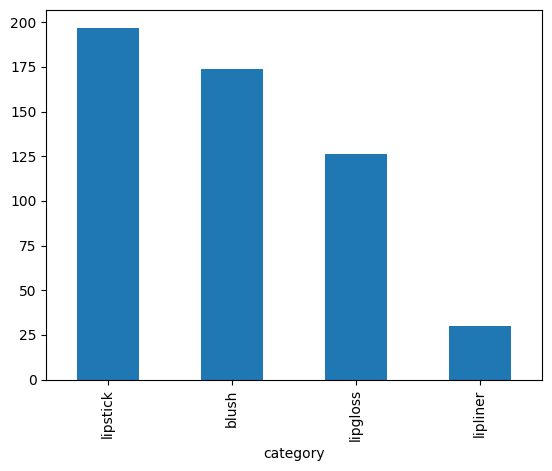

In [ ]:
df['category'].value_counts().plot.bar()

The are over 159 unique brands and 59.12% of the brands have at least two products in the data.

In [ ]:
brands_count = pd.DataFrame(df['brand'].value_counts())
brands_count = brands_count.reset_index()
brands_count.columns = ['brand', 'total']

print('Percentage of brands with more than 10 products:')

print(round(len(brands_count[brands_count.total > 10].brand.unique())/len(brands_count.brand.unique())*100,2))

print('\n')
print('Percentage of brands with more than 2 products:')
print(round(len(brands_count[brands_count.total > 1].brand.unique())/len(brands_count.brand.unique())*100,2))

print('\n')
print('Number of brands with 1 products')
print(round(len(brands_count[brands_count.total == 1].brand.unique())/len(brands_count.brand.unique())*100,2))


Percentage of brands with more than 10 products:
6.29


Percentage of brands with more than 2 products:
59.12


Number of brands with 1 products
40.88


In [32]:
len(df['brand'].unique())

# Exploring the Images

To gain deeper insights into our makeup image data, we can extract information on size, resolution, and color distribution from the images in the directory. This analysis offers valuable details about the characteristics of the images and helps us identify patterns within the dataset.



In [21]:
root_path = '/content/drive/My Drive/makeup_img/'

In [23]:
# Initialize empty lists to store the information
sizes = []
resolutions = []
color_distributions = []

# Iterate over each image file in folder
for file in glob.glob('/content/drive/My Drive/makeup_img/'+'*'):
  #print(file)
  if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif')):
    # Load the image file using OpenCV
    img_path = os.path.join('/content/drive/My Drive/makeup_img/', file)
    img = cv2.imread(img_path)

    # Extract the size of the image
    size = os.path.getsize(img_path)
    sizes.append(size)

    # Extract the resolution of the image
    resolution = img.shape[:2]
    resolutions.append(resolution)

    # Extract the color distribution of the image
    color_distribution = np.bincount(img.flatten(), minlength=256)
    color_distributions.append(color_distribution)

# Convert the lists to numpy arrays for easier manipulation
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

We can create a histogram that illustrates the distribution of image sizes in our dataset. By plotting the image sizes (in bytes), we can observe the range and frequency of different sizes. This visualization helps us identify outliers and common size patterns, which can be valuable for further analysis. Most of the images are small in bytes.



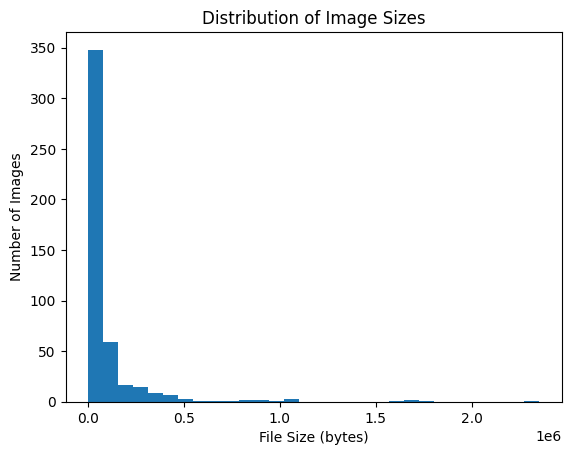

In [27]:
# Plot a histogram of the image sizes
plt.hist(sizes, 30)
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

Additionally, we can generate a scatter plot that visualizes the distribution of image resolutions (width and height) in our dataset. This plot enables us to detect any relationships, patterns, or clusters among the image dimensions. Analyzing the scatter plot provides insights into the overall size characteristics of the images and helps uncover any irregularities or trends. For instance, one image is considerably larger than all other images in both height and width.

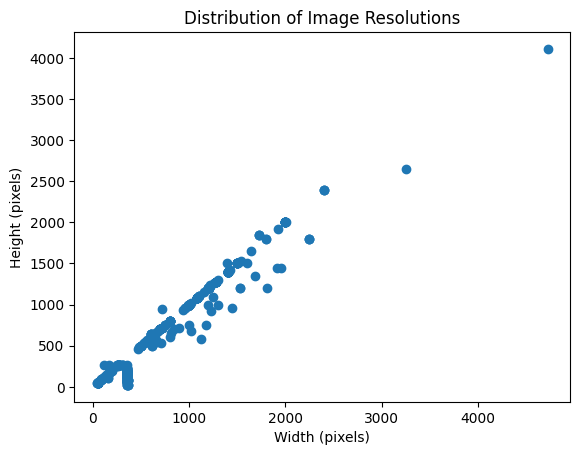

In [28]:
# Plot a scatter plot of the image resolutions
plt.scatter(resolutions[:, 0], resolutions[:, 1])
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

Analyzing the color distribution of makeup images is a crucial aspect of exploring image data. I'll calculate the mean color distribution across all images to identify the dominant shades within the dataset. This distribution can be visualized with a bar chart, displaying the mean color values and their frequencies, helping us pinpoint the most prominent colors in the makeup image dataset. However, one limitation of this approach is that averaging colors might obscure the nuances of individual shades, potentially blending distinct colors into less representative averages.

In the code below the `np.arange(256)` function generates an array of values from 0 to 255, which corresponds to the possible intensity levels in an 8-bit color channel. This array is used to create a bar chart where each bar represents the frequency of each intensity level, from 0 to 255.

The frequent appearance of 255 could suggest that the dataset contains a lot of very bright regions, possibly because images tend to have a white background.  In an 8-bit RGB image, a white background means that the red, green, and blue channels all have the maximum value of 255. Therefore, if a significant portion of the image consists of a white background, it would result in a high frequency of the 255 intensity value.

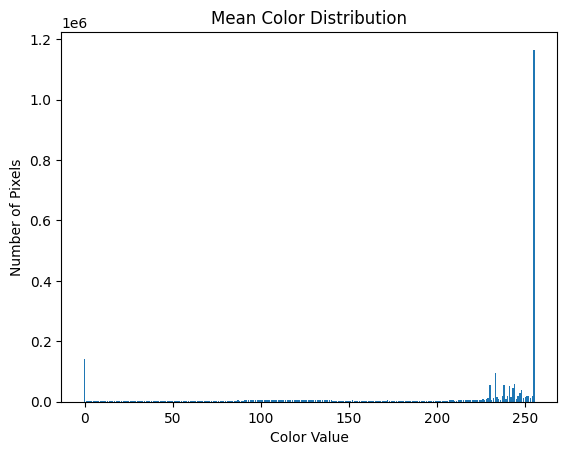

In [29]:
# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Plot a bar chart of the mean color distribution
plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.show()

To gain a deeper understanding of the color properties in individual makeup images, I will use stacked bar charts to visualize the color distributions for each image. This approach allows us to examine the proportion of different colors within each image and detect any distinct patterns or variations. Unlike the mean color distribution method, which averages color values across all images and may obscure individual nuances, stacked bar charts provide a detailed view of the color composition for each image, revealing more specific insights into the dataset.

In [31]:
import plotly.graph_objs as go

# Create a list of bar traces for each color value
traces = []
for i in range(256):
    traces.append(go.Bar(x=np.arange(len(color_distributions)), y=color_distributions[:, i], name=str(i)))

# Create the figure and set the layout
fig = go.Figure(data=traces)
fig.update_layout(title="Color Distributions for Each Image", xaxis_title="Image Index", yaxis_title="Number of Pixels", barmode="stack")
# Show the plot
fig.show()

# Save data

In [ ]:
df.to_csv('/content/drive/My Drive/data/processed/data_1.csv')